In [71]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
import plotly.express as px

#IMPORT 5 ALGORITHMS FROM SKLEARN
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LassoCV

#INSTANTIATE 5 ALGORITHMS/ESTIMATORS
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
etr = ExtraTreesRegressor()
ada = AdaBoostRegressor()
lso = LassoCV()

In [3]:
df = pd.read_csv(r'C:\thesis\datasets_clf.csv')
df2 = pd.read_csv(r'C:\thesis\datasets_clf.csv')
df

,student_id,age,sex,course,yr_level,socioeconomic_stat,fam_support,working_stud,scholar,personality_type,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,F,CD,2,low,yes,no,yes,ISTJ,...,never,always,always,sometimes,always,always,sometimes,sometimes,1.5588,Superior
1,2021-02910,19.0,F,CD,2,lower middle,yes,no,no,ESFJ,...,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,1.3824,Superior
2,2021-02862,19.0,F,CD,2,low,yes,no,no,ENTP,...,always,never,always,sometimes,sometimes,always,sometimes,sometimes,1.5882,Superior
3,2021-02890,19.0,F,CD,2,lower middle,yes,yes,no,ESFJ,...,always,sometimes,never,sometimes,sometimes,sometimes,always,sometimes,1.5000,Superior
4,2020-04136,20.0,F,CD,2,low,yes,no,no,ISFJ,...,sometimes,never,sometimes,sometimes,never,sometimes,sometimes,always,1.4347,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,F,SW,2,lower middle,yes,no,no,ISFP,...,always,sometimes,never,never,Sometimes,sometimes,sometimes,never,1.9559,Very-Satisfactory
353,2021-01868,20.0,F,SW,2,low,yes,yes,no,ISFP,...,always,never,sometimes,sometimes,Sometimes,always,sometimes,never,1.5294,Superior
354,2021-01891,19.0,F,SW,2,low,yes,no,no,ENFJ,...,always,never,always,never,always,sometimes,sometimes,sometimes,1.7647,Very-Satisfactory
355,2021-01897,19.0,F,SW,2,low,yes,no,no,ISFP,...,always,always,sometimes,never,always,always,sometimes,never,1.4853,Superior


# DATA EXPLORATION

In [4]:
#Dimension of the raw dataframe
print("Dimension of the data raw dataframe Rows by Columns, ", df.shape)

Dimension of the data raw dataframe Rows by Columns,  (357, 51)


In [5]:
#check Dataframe with null values
df2.isna().sum()

student_id             0
age                   11
sex                    6
course                 0
yr_level               0
socioeconomic_stat     0
fam_support            0
working_stud           0
scholar                0
personality_type       0
TM1                    0
TM2                    0
TM3                    0
TM4                    0
TM5                    0
TM6                    0
TM7                    0
CAP1                   0
CAP2                   0
CAP3                   1
CAP4                   0
GSS1                   0
GSS2                   0
GSS3                   0
GSS4                   0
GSS5                   0
GSS6                   0
GSS7                   0
EP1                    0
EP2                    0
EP3                    0
EP4                    0
EP5                    0
EP6                    0
NT1                    0
NT2                    0
NT3                    0
desktop                0
laptop                 0
mobile_phone           0


In [6]:
df.describe()

,age,yr_level,GPA
count,346.000000,357.000000,357.000000
mean,20.462428,2.851541,1.918353
std,1.520880,0.740353,0.446958
min,10.000000,2.000000,1.197900
25%,20.000000,2.000000,1.586500
50%,20.000000,3.000000,1.855800
75%,21.000000,3.000000,2.148700
max,29.000000,4.000000,4.368400


# DATA CLEANING

In [7]:
#Check Sex consistency
print("Sex Attributes :" ,df2.sex.unique())
print("""  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.""""" )

#checking missing value for sex
print("\nNumber of missing values of Sex","[" ,df2.sex.isna().sum(), "]")

#Replace Sex value with a precise value 'S' and 'M' and Fill values
df["sex"].replace("M ", "M", inplace = True)
df["sex"].replace("F ", "F", inplace = True)
df["sex"].fillna(method="ffill", inplace=True)

#Check uniqueness of Sex
print("\nUpdated Attributes inside Sex : " ,df["sex"].unique())

print("\nNumber of missing values of Sex","[" ,df.sex.isna().sum(), "]")

#Values of each attribute for Sex
valueCounts_MaleFemale = df.sex.value_counts()
valueCounts_MaleFemale


Sex Attributes : ['F' 'M' nan 'M ' 'F ']
  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.

Number of missing values of Sex [ 6 ]

Updated Attributes inside Sex :  ['F' 'M']

Number of missing values of Sex [ 0 ]


F    198
M    159
Name: sex, dtype: int64

In [8]:
#Check uniqueness for age
Age_Unique = df.age.sort_values().unique()
Age_Unique

array([10., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       nan])

In [9]:
#Check for missing values for age
AgeMissing = df2["age"].isna().sum()
print("\nNumber of missing value of age : ", AgeMissing, " missing")

#Filling missing values for age with mean.
df.age.fillna(df["age"].mean(), inplace = True)

#Check for missing values for age
print("\nNumber of missing value of age : ", df["age"].isna().sum(), " missing")


Number of missing value of age :  11  missing

Number of missing value of age :  0  missing


In [10]:
#fill missing values for CAP3
df["CAP3"].fillna(method="ffill", inplace = True)
print("\nNumber of missing value of CAP3 : ", df["CAP3"].isna().sum())


Number of missing value of CAP3 :  0


In [11]:
print("Dataframe has no missing value")
df.isna().sum()

Dataframe has no missing value


student_id            0
age                   0
sex                   0
course                0
yr_level              0
socioeconomic_stat    0
fam_support           0
working_stud          0
scholar               0
personality_type      0
TM1                   0
TM2                   0
TM3                   0
TM4                   0
TM5                   0
TM6                   0
TM7                   0
CAP1                  0
CAP2                  0
CAP3                  0
CAP4                  0
GSS1                  0
GSS2                  0
GSS3                  0
GSS4                  0
GSS5                  0
GSS6                  0
GSS7                  0
EP1                   0
EP2                   0
EP3                   0
EP4                   0
EP5                   0
EP6                   0
NT1                   0
NT2                   0
NT3                   0
desktop               0
laptop                0
mobile_phone          0
tablet                0
wifi            

In [12]:
df.socioeconomic_stat.unique()

array(['low', 'lower middle', 'middle', 'upper middle', 'low ',
       'Upper but not rich', 'rich', 'lower'], dtype=object)

# RECONSTRUCTING VALUES INSIDE COLUMNS

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

In [14]:
#PRINT UNIQUENESS 
print(" Unique of age : ", df2["age"].unique(), "\n")
print(" Unique of sex : ", df2["sex"].unique(), "\n")
print(" Unique of course : ", df2["course"].unique(), "\n")
print(" Unique of yr_level: ", df2["yr_level"].unique(), "\n")
print(" Unique of socioeconomic_stat : ", df2["socioeconomic_stat"].unique(), "\n")
print(" Unique of fam_support : ", df2["fam_support"].unique(), "\n")
print(" Unique of working_stud : ", df2["working_stud"].unique(), "\n")
print(" Unique of scholar : ", df2["scholar"].unique(), "\n")
print(" Unique of personality_type : ", df2["personality_type"].unique(), "\n")
print(" Unique of TM1 : ", df2["TM1"].unique(), "\n")
print(" Unique of TM2 : ", df2["TM2"].unique(), "\n")
print(" Unique of TM3 : ", df2["TM3"].unique(), "\n")
print(" Unique of TM4 : ", df2["TM4"].unique(), "\n")
print(" Unique of TM5 : ", df2["TM5"].unique(), "\n")
print(" Unique of TM6 : ", df2["TM6"].unique(), "\n")
print(" Unique of TM7 : ", df2["TM7"].unique(), "\n")
print(" Unique of CAP1 : ", df2["CAP1"].unique(), "\n")
print(" Unique of CAP2 : ", df2["CAP2"].unique(), "\n")
print(" Unique of CAP3 : ", df2["CAP3"].unique(), "\n")
print(" Unique of CAP4 : ", df2["CAP4"].unique(), "\n")
print(" Unique of GSS1 : ", df2["GSS1"].unique(), "\n")
print(" Unique of GSS2 : ", df2["GSS2"].unique(), "\n")
print(" Unique of GSS3 : ", df2["GSS3"].unique(), "\n")
print(" Unique of GSS4 : ", df2["GSS4"].unique(), "\n")
print(" Unique of GSS5 : ", df2["GSS5"].unique(), "\n")
print(" Unique of GSS6 : ", df2["GSS6"].unique(), "\n")
print(" Unique of GSS7 : ", df2["GSS7"].unique(), "\n")
print(" Unique of EP1 : ", df2["EP1"].unique(), "\n")
print(" Unique of EP2 : ", df2["EP2"].unique(), "\n")
print(" Unique of EP3 : ", df2["EP3"].unique(), "\n")
print(" Unique of EP4 : ", df2["EP4"].unique(), "\n")
print(" Unique of EP5 : ", df2["EP5"].unique(), "\n")
print(" Unique of EP6 : ", df2["EP6"].unique(), "\n")
print(" Unique of NT1 : ", df2["NT1"].unique(), "\n")
print(" Unique of NT2 : ", df2["NT2"].unique(), "\n")
print(" Unique of NT3 : ", df2["NT3"].unique(), "\n")
print(" Unique of desktop : ", df2["desktop"].unique(), "\n")
print(" Unique of laptop : ", df2["laptop"].unique(), "\n")
print(" Unique of mobile_phone : ", df2["mobile_phone"].unique(), "\n")
print(" Unique of tablet : ", df2["tablet"].unique(), "\n")
print(" Unique of wifi : ", df2["wifi"].unique(), "\n")
print(" Unique of prepaid-wifi : ", df2["prepaid-wifi"].unique(), "\n")
print(" Unique of cellular_data : ", df2["cellular_data"].unique(), "\n")
print(" Unique of hotspot : ", df2["hotspot"].unique(), "\n")
print(" Unique of vhigh_speed : ", df2["vhigh_speed"].unique(), "\n")
print(" Unique of high_speed : ", df2["high_speed"].unique(), "\n")
print(" Unique of moderate_speed : ", df2["moderate_speed"].unique(), "\n")
print(" Unique of light_speed : ", df2["light_speed"].unique(), "\n")


 Unique of age :  [19. 20. 21. 25. 18. nan 22. 27. 24. 23. 29. 28. 10. 26.] 

 Unique of sex :  ['F' 'M' nan 'M ' 'F '] 

 Unique of course :  ['CD' 'IT' 'CS' 'SW'] 

 Unique of yr_level:  [2 3 4] 

 Unique of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'low ' 'Upper but not rich'
 'rich' 'lower'] 

 Unique of fam_support :  ['yes' 'no'] 

 Unique of working_stud :  ['no' 'yes'] 

 Unique of scholar :  ['yes' 'no'] 

 Unique of personality_type :  ['ISTJ' 'ESFJ' 'ENTP' 'ISFJ' 'ENFJ' 'INFJ' 'ISFP' 'INTJ' 'ENTJ' 'ESTP'
 'INFP' 'ESFP' 'ESTJ' 'ENFP' 'ISTP' 'INTP'] 

 Unique of TM1 :  ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom'
 'sometiems'] 

 Unique of TM2 :  ['sometimes' 'never' 'always'] 

 Unique of TM3 :  ['sometimes' 'always' 'never'] 

 Unique of TM4 :  ['always' 'sometimes' 'never'] 

 Unique of TM5 :  ['always' 'sometimes' 'never'] 

 Unique of TM6 :  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes'] 

 Unique of TM7 

       JUSTIFICATION :
           Columns that REQUIRES replacing unwanted values;
              TM1 -> ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom' 'sometiems'] 
              TM6 ->  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes']
              CAP1 -> ['always' 'sometimes' 'Always' 'never'] 
              CAP2 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimesnever' 's'] 
              GSS5 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimes ' 'sometime'] 
              tablet -> ['never' 'sometimes' 'an' 'always']
              prepaid-wifi -> ['always' 'sometimes' 'never' 'Sometimes'] 
              vhigh_speed -> ['always' 'sometimes' 'never' 'Sometimes'] 
              high_speed -> ['always' 'sometimes' 'never' 'high'] 
              moderate_speed -> ['sometimes' 'always' 'never' 'moderate'] 
                
       **THE FF. INPUTS WAS NOT CONSISTENT**    

In [15]:
#Replacing unwanted values
df.replace({
            'socioeconomic_stat' : {'low ':'low', 'lower':'low'},
            'TM1' : {'sometime':'sometimes',
                     'Sometimes':'sometimes',
                     'sometimesom':'sometimes',
                     'sometiems':'sometimes'
                    },
            'TM6' : {'sometime':'sometimes',
                     'sometimess':'sometimes',
                     'someyimes':'sometimes'
                    },
            'CAP1' : {'Always':'always'},
            'CAP2' : {'Sometimes':'sometimes',
                      'sometimesnever':'sometimes',
                      's':'sometimes'
                     },
            'GSS5' : {'Sometimes':'sometimes',
                      'sometimes ':'sometimes', 
                      'sometime':'sometimes'},
            'tablet' : {'an':'always'},
            'prepaid-wifi' : {'Sometimes':'sometimes'},
            'vhigh_speed' : {'Sometimes':'sometimes'},
            'high_speed' : {'high':'always'},
            'moderate_speed' : {'moderate':'sometimes'}
           }, inplace=True)

In [16]:
print("Updated Uniqueness of socioeconomic_stat : ", df["socioeconomic_stat"].unique(), "\n")
print("Updated Uniqueness of TM1 : ", df["TM1"].unique(),"\n")
print("Updated Uniqueness of TM6 : ", df["TM6"].unique(),"\n")
print("Updated Uniqueness of CAP1 : ", df["CAP1"].unique(),"\n")
print("Updated Uniqueness of CAP2 : ", df["CAP2"].unique(),"\n")
print("Updated Uniqueness of GSS5 : ", df["GSS5"].unique(),"\n")
print("Updated Uniqueness of prepaid-wifi : ", df["prepaid-wifi"].unique(),"\n")
print("Updated Uniqueness of vhigh_speed : ", df["vhigh_speed"].unique(),"\n")
print("Updated Uniqueness of high_speed : ", df["high_speed"].unique(),"\n")
print("Updated Uniqueness of moderate_speed : ", df["moderate_speed"].unique(),"\n")

Updated Uniqueness of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'Upper but not rich' 'rich'] 

Updated Uniqueness of TM1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of TM6 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP2 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of GSS5 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of prepaid-wifi :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of vhigh_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of high_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of moderate_speed :  ['sometimes' 'always' 'never'] 



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

# TRANSFORMING DATA

In [18]:
from category_encoders import OrdinalEncoder
Select_StudInfo_MBTIFeatures = df.iloc[:, [0,1,2,3,4,5,9]]
maplist = [{'col' : 'socioeconomic_stat', 'mapping' : {'low' : 1 ,'lower middle' : 2 ,'middle' : 3, 'upper middle': 4, 'Upper but not rich' : 5,  'rich' :6}},
           {'col' : 'sex' , 'mapping' : { 'F' : 0 , 'M' : 1}},
           {'col' : 'course' , 'mapping' : { 'CD':1, 'IT':2, 'CS':3 , 'SW':4}},
           {'col' : 'personality_type' , 'mapping' : {'ISTJ':0, 'ESFJ':1, 'ENTP':2, 'ISFJ':3, 'ENFJ':4, 'INFJ':5, 'ISFP':6, 'INTJ':7,
       'ENTJ':8, 'ESTP':9, 'INFP':10, 'ESFP':11, 'ESTJ':12, 'ENFP':13, 'ISTP':14, 'INTP':15}}]
oeStudentInfo = OrdinalEncoder(mapping=maplist)
StudInfo_DF = oeStudentInfo.fit_transform(Select_StudInfo_MBTIFeatures)

In [19]:
Select_demographicFeatures = df.iloc[:, [6, 7, 8]]
maplist = [{'col' : 'fam_support', 
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'scholar',
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'working_stud', 
                    'mapping' : {'yes' : 1, 'no' : 0}}]
oeDic = OrdinalEncoder(mapping=maplist)
DiFeatures_DF = oeDic.fit_transform(Select_demographicFeatures)

In [20]:
Select_Tri_ValFeatures = df.iloc[:, 10 : 51]
maplist = [{'col' : 'TM1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'desktop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'laptop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'mobile_phone', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'tablet', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'prepaid-wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'cellular_data', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'hotspot', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'vhigh_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'high_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'moderate_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'light_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}}]

oeTri = OrdinalEncoder(mapping=maplist)
TriFeatures_DF = oeTri.fit_transform(Select_Tri_ValFeatures)

# DATAFRAME CONCATINATION

In [22]:
newDF =  pd.concat([StudInfo_DF, DiFeatures_DF,TriFeatures_DF], axis=1)
newDF

,student_id,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,0,1,2,1,0,1,0,1,...,3,1,1,2,1,1,2,2,1.5588,Superior
1,2021-02910,19.0,0,1,2,2,1,1,0,0,...,2,2,2,2,2,2,2,2,1.3824,Superior
2,2021-02862,19.0,0,1,2,1,2,1,0,0,...,1,3,1,2,2,1,2,2,1.5882,Superior
3,2021-02890,19.0,0,1,2,2,1,1,1,0,...,1,2,3,2,2,2,1,2,1.5000,Superior
4,2020-04136,20.0,0,1,2,1,3,1,0,0,...,2,3,2,2,3,2,2,1,1.4347,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,0,4,2,2,6,1,0,0,...,1,2,3,3,2,2,2,3,1.9559,Very-Satisfactory
353,2021-01868,20.0,0,4,2,1,6,1,1,0,...,1,3,2,2,2,1,2,3,1.5294,Superior
354,2021-01891,19.0,0,4,2,1,4,1,0,0,...,1,3,1,3,1,2,2,2,1.7647,Very-Satisfactory
355,2021-01897,19.0,0,4,2,1,6,1,0,0,...,1,1,2,3,1,1,2,3,1.4853,Superior


In [23]:
newDF.sex.unique()

array([0, 1])

In [24]:
newDF.to_csv(r'C:\thesis\clean_datasets.csv', index = False, header=True)

In [25]:
newDF.age.unique()

array([19.        , 20.        , 21.        , 25.        , 18.        ,
       20.46242775, 22.        , 27.        , 24.        , 23.        ,
       29.        , 28.        , 10.        , 26.        ])

In [26]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    int32  
 3   course              357 non-null    int32  
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    int32  
 6   personality_type    357 non-null    int32  
 7   fam_support         357 non-null    int32  
 8   working_stud        357 non-null    int32  
 9   scholar             357 non-null    int32  
 10  TM1                 357 non-null    int32  
 11  TM2                 357 non-null    int32  
 12  TM3                 357 non-null    int32  
 13  TM4                 357 non-null    int32  
 14  TM5                 357 non-null    int32  
 15  TM6                 357 non-null    int32  
 16  TM7     

In [27]:
newDF.personality_type.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [28]:
newDF

,student_id,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,0,1,2,1,0,1,0,1,...,3,1,1,2,1,1,2,2,1.5588,Superior
1,2021-02910,19.0,0,1,2,2,1,1,0,0,...,2,2,2,2,2,2,2,2,1.3824,Superior
2,2021-02862,19.0,0,1,2,1,2,1,0,0,...,1,3,1,2,2,1,2,2,1.5882,Superior
3,2021-02890,19.0,0,1,2,2,1,1,1,0,...,1,2,3,2,2,2,1,2,1.5000,Superior
4,2020-04136,20.0,0,1,2,1,3,1,0,0,...,2,3,2,2,3,2,2,1,1.4347,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,0,4,2,2,6,1,0,0,...,1,2,3,3,2,2,2,3,1.9559,Very-Satisfactory
353,2021-01868,20.0,0,4,2,1,6,1,1,0,...,1,3,2,2,2,1,2,3,1.5294,Superior
354,2021-01891,19.0,0,4,2,1,4,1,0,0,...,1,3,1,3,1,2,2,2,1.7647,Very-Satisfactory
355,2021-01897,19.0,0,4,2,1,6,1,0,0,...,1,1,2,3,1,1,2,3,1.4853,Superior


In [29]:
newDF.yr_level.unique()

array([2, 3, 4], dtype=int64)

In [30]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    int32  
 3   course              357 non-null    int32  
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    int32  
 6   personality_type    357 non-null    int32  
 7   fam_support         357 non-null    int32  
 8   working_stud        357 non-null    int32  
 9   scholar             357 non-null    int32  
 10  TM1                 357 non-null    int32  
 11  TM2                 357 non-null    int32  
 12  TM3                 357 non-null    int32  
 13  TM4                 357 non-null    int32  
 14  TM5                 357 non-null    int32  
 15  TM6                 357 non-null    int32  
 16  TM7     

# DESCRIPTIVE VISUALIZATION

In [31]:
#create datframe for demographics
newDEMOinfo = df.iloc[:, [0,1,2,3,4,5,9]]

In [32]:
#create dummy to all tri-features
timeManagement_TM = pd.get_dummies(df.iloc[:,10:17])
classAttendancePartcipation_CAP = pd.get_dummies(df.iloc[:,17:21])

In [33]:
#tri-dataframes
DEMOandTM_DF = pd.concat([newDEMOinfo, timeManagement_TM], axis=1)
DEMOandCAP_DF = pd.concat([newDEMOinfo, classAttendancePartcipation_CAP], axis=1)

## PLOT TIME MANAGEMENT FOR PERSONALITY TYPE

In [34]:
#create pivo_tabel for each tri-features for plotting
count_tm1_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM1_always", "TM1_sometimes","TM1_never"] , index="personality_type", aggfunc='sum')

count_tm2_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM2_always", "TM2_sometimes","TM2_never"] , index="personality_type", aggfunc='sum')

count_tm3_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM3_always", "TM3_sometimes","TM3_never"] , index="personality_type", aggfunc='sum')

count_tm4_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM4_always", "TM4_sometimes","TM4_never"] , index="personality_type", aggfunc='sum')

count_tm5_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM5_always", "TM5_sometimes","TM5_never"] , index="personality_type", aggfunc='sum')

count_tm6_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM6_always", "TM6_sometimes","TM6_never"] , index="personality_type", aggfunc='sum')

count_tm7_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM7_always", "TM7_sometimes","TM7_never"] , index="personality_type", aggfunc='sum')

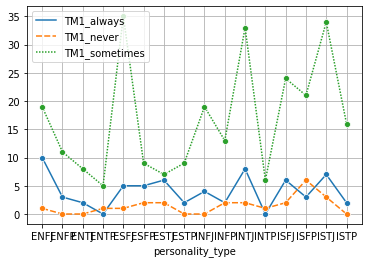

In [35]:
sns.lineplot(data=count_tm1_freq, marker="o")
plt.grid()

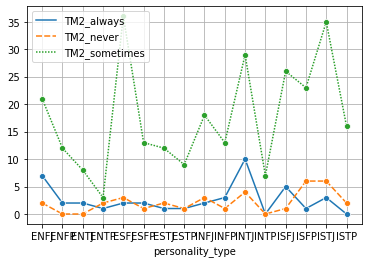

In [36]:
sns.lineplot(data=count_tm2_freq, marker="o")
plt.grid()

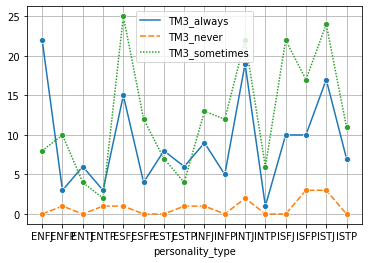

In [37]:
sns.lineplot(data=count_tm3_freq, marker="o")
plt.grid()

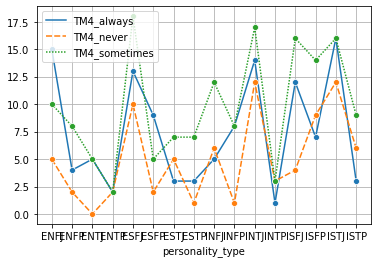

In [38]:
sns.lineplot(data=count_tm4_freq, marker="o")
plt.grid()

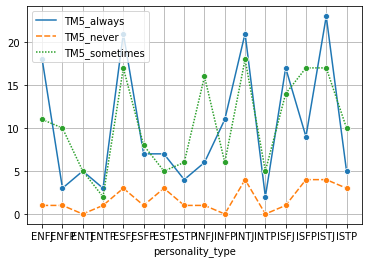

In [39]:
sns.lineplot(data=count_tm5_freq, marker="o")
plt.grid()

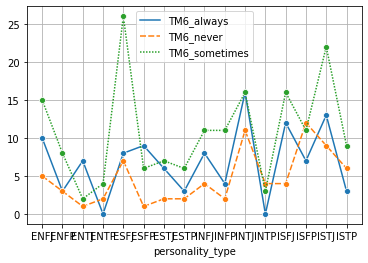

In [40]:
sns.lineplot(data=count_tm6_freq, marker="o")
plt.grid()

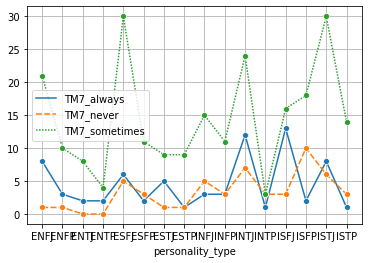

In [41]:
sns.lineplot(data=count_tm7_freq, marker="o")
plt.grid()

<AxesSubplot:title={'center':'Age Distribution'}>

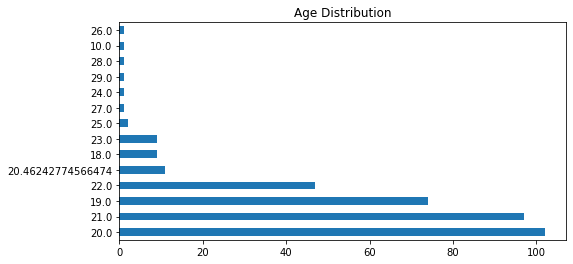

In [42]:
#count 'sex' column ing pie chart
newDF["age"].value_counts()[:].plot(kind='barh', title='Age Distribution', figsize=(8,4))

<AxesSubplot:xlabel='sex,fam_support'>

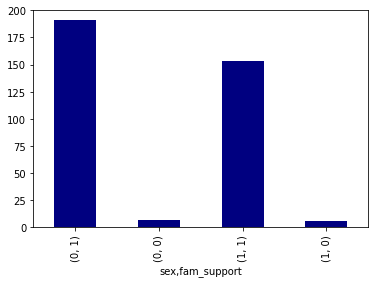

In [43]:
#Count of each sex with family_support
PersonalityPopu = newDF.groupby('sex')[["fam_support"]].value_counts()
PersonalityPopu.plot(kind='bar', colormap='jet')

In [44]:
DiFeatures_DF.corr()

,fam_support,working_stud,scholar
fam_support,1.000000,-0.305185,-0.023546
working_stud,-0.305185,1.000000,0.077603
scholar,-0.023546,0.077603,1.000000


In [45]:
StudInfo_DF.corr()

,age,sex,course,yr_level,socioeconomic_stat,personality_type
age,1.000000,-0.008345,0.073705,0.458607,0.044174,0.032515
sex,-0.008345,1.000000,0.095132,-0.025881,0.096737,0.073796
course,0.073705,0.095132,1.000000,0.042690,0.033566,0.111371
yr_level,0.458607,-0.025881,0.042690,1.000000,0.065533,-0.005072
socioeconomic_stat,0.044174,0.096737,0.033566,0.065533,1.000000,0.056496
personality_type,0.032515,0.073796,0.111371,-0.005072,0.056496,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'course'}>,
        <AxesSubplot:title={'center':'yr_level'}>,
        <AxesSubplot:title={'center':'socioeconomic_stat'}>,
        <AxesSubplot:title={'center':'personality_type'}>,
        <AxesSubplot:title={'center':'fam_support'}>],
       [<AxesSubplot:title={'center':'working_stud'}>,
        <AxesSubplot:title={'center':'scholar'}>,
        <AxesSubplot:title={'center':'TM1'}>,
        <AxesSubplot:title={'center':'TM2'}>,
        <AxesSubplot:title={'center':'TM3'}>,
        <AxesSubplot:title={'center':'TM4'}>,
        <AxesSubplot:title={'center':'TM5'}>],
       [<AxesSubplot:title={'center':'TM6'}>,
        <AxesSubplot:title={'center':'TM7'}>,
        <AxesSubplot:title={'center':'CAP1'}>,
        <AxesSubplot:title={'center':'CAP2'}>,
        <AxesSubplot:title={'center':'CAP3'}>,
        <AxesSubplot:title={'center':'CAP4'}>,
        <AxesSubp

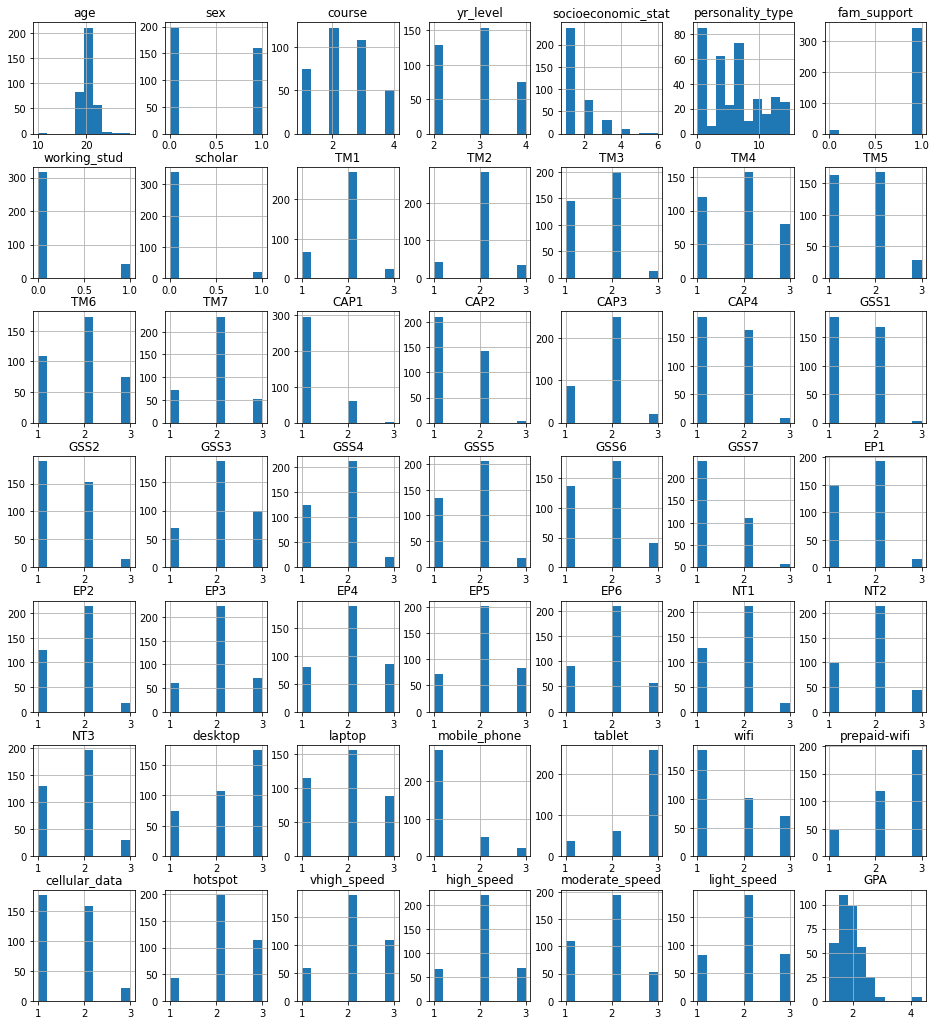

In [46]:
newDF.hist(grid=True,  figsize = (16,18))

### Dropping columns 

In [47]:
newDF.drop(columns = 'student_id', inplace=True)

In [48]:
newDF.head(10)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,19.0,0,1,2,1,0,1,0,1,1,...,3,1,1,2,1,1,2,2,1.5588,Superior
1,19.0,0,1,2,2,1,1,0,0,2,...,2,2,2,2,2,2,2,2,1.3824,Superior
2,19.0,0,1,2,1,2,1,0,0,2,...,1,3,1,2,2,1,2,2,1.5882,Superior
3,19.0,0,1,2,2,1,1,1,0,2,...,1,2,3,2,2,2,1,2,1.5000,Superior
4,20.0,0,1,2,1,3,1,0,0,1,...,2,3,2,2,3,2,2,1,1.4347,Superior
5,21.0,0,1,2,1,4,1,0,0,2,...,1,3,1,3,2,2,2,1,2.2500,Satisfactory
6,19.0,0,1,2,1,0,1,0,0,2,...,2,3,2,3,3,3,2,3,1.5000,Superior
7,21.0,0,1,2,1,5,0,1,0,2,...,1,2,2,2,2,2,2,2,1.5294,Superior
8,19.0,0,1,2,1,6,1,0,0,1,...,2,2,2,2,2,2,2,2,1.7206,Superior
9,19.0,0,1,2,1,3,1,0,0,2,...,3,3,1,3,3,3,2,1,1.5000,Superior


## EDA HERE!

## END OF EDA

# Checking Outliers

[Text(0.5, 1.0, 'Outliers of StudInfo_DF')]

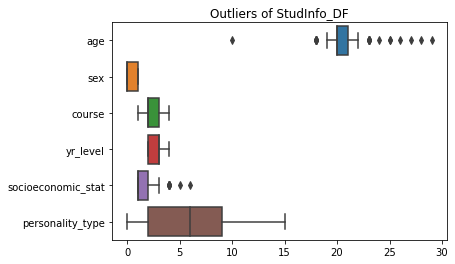

In [49]:
sns.boxplot(data=StudInfo_DF, orient = "h").set(title="Outliers of StudInfo_DF")

[Text(0.5, 1.0, 'Box Plot of Scores')]

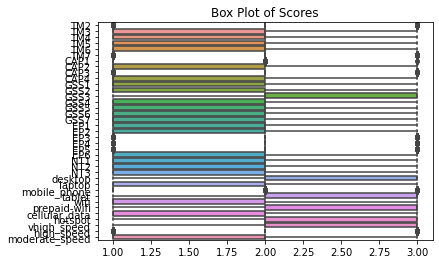

In [50]:
sns.boxplot(data=newDF.iloc[:, 10:47], orient = "h").set(title="Box Plot of Scores")

[Text(0.5, 1.0, 'Box Plot of Scores')]

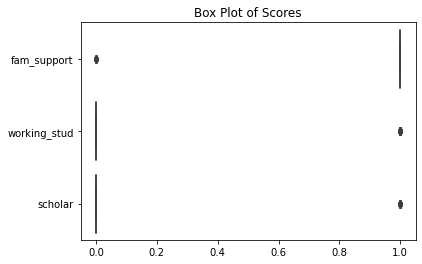

In [51]:
sns.boxplot(data=DiFeatures_DF, orient = "h").set(title="Box Plot of Scores")

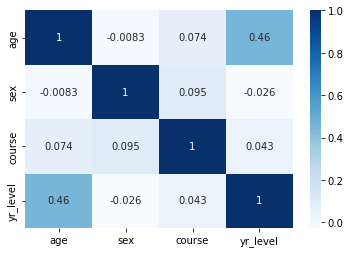

In [52]:
sns.heatmap(newDF[['age', 'sex', 'course', 'yr_level']].corr(), cmap='Blues', annot=True)
plt.show()

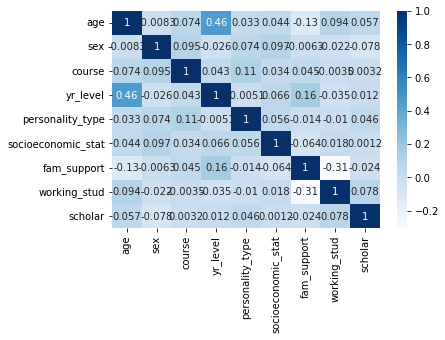

In [53]:
sns.heatmap(newDF[['age', 'sex', 'course', 'yr_level', 'personality_type',
       'socioeconomic_stat', 'fam_support', 'working_stud', 'scholar']].corr(), cmap='Blues', annot=True)
plt.show()

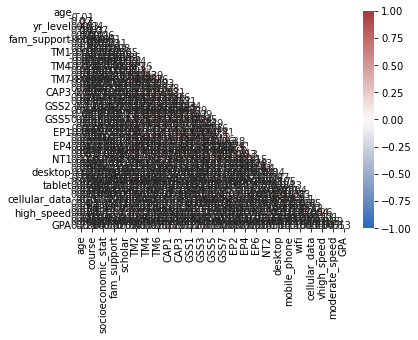

In [54]:
matrix = newDF.corr(method = 'pearson', min_periods = 1).round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [55]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 357 non-null    float64
 1   sex                 357 non-null    int32  
 2   course              357 non-null    int32  
 3   yr_level            357 non-null    int64  
 4   socioeconomic_stat  357 non-null    int32  
 5   personality_type    357 non-null    int32  
 6   fam_support         357 non-null    int32  
 7   working_stud        357 non-null    int32  
 8   scholar             357 non-null    int32  
 9   TM1                 357 non-null    int32  
 10  TM2                 357 non-null    int32  
 11  TM3                 357 non-null    int32  
 12  TM4                 357 non-null    int32  
 13  TM5                 357 non-null    int32  
 14  TM6                 357 non-null    int32  
 15  TM7                 357 non-null    int32  
 16  CAP1    

In [56]:
features=newDF.columns[0:-1].values
features

array(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar',
       'TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2',
       'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6',
       'GSS7', 'EP1', 'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2',
       'NT3', 'desktop', 'laptop', 'mobile_phone', 'tablet', 'wifi',
       'prepaid-wifi', 'cellular_data', 'hotspot', 'vhigh_speed',
       'high_speed', 'moderate_speed', 'light_speed', 'GPA'], dtype=object)

In [57]:
target=newDF.columns[-1:].values
target

array(['gpa_range'], dtype=object)

## Split data to train and test dataset

In [59]:
from sklearn.model_selection import train_test_split
train, test =train_test_split(newDF, test_size=0.2, random_state=42)
train.sample(10)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
137,20.0,0,3,3,1,7,1,0,0,2,...,3,3,1,3,1,1,2,2,2.3182,Satisfactory
308,20.0,0,4,3,1,0,1,0,0,1,...,1,1,2,2,2,2,2,2,1.8152,Very-Satisfactory
326,20.0,0,4,3,1,7,1,0,0,2,...,3,1,1,2,2,2,1,2,1.9457,Very-Satisfactory
242,20.0,1,2,3,1,0,1,0,0,2,...,1,2,1,3,1,1,1,3,2.5357,Satisfactory
111,19.0,1,3,2,2,0,1,0,0,3,...,3,1,2,3,3,2,1,2,1.5481,Superior
127,21.0,1,3,3,1,7,1,1,0,2,...,3,3,1,1,3,3,3,1,2.4659,Satisfactory
186,19.0,0,2,2,1,1,1,0,0,2,...,2,3,2,2,3,2,1,2,1.8646,Very-Satisfactory
276,20.0,1,2,3,1,0,1,0,0,2,...,1,3,3,3,2,2,2,1,2.3571,Satisfactory
120,21.0,1,3,3,2,9,1,0,0,2,...,1,3,2,2,2,2,2,2,1.5341,Superior
261,22.0,0,2,4,1,0,1,0,0,2,...,1,1,2,2,2,1,1,2,2.2000,Very-Satisfactory


In [60]:
train.head(5)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
282,21.0,0,2,4,1,0,1,0,0,2,...,2,3,1,3,2,2,1,2,2.4375,Satisfactory
333,20.0,0,4,3,1,5,1,0,0,2,...,3,3,1,2,3,3,1,3,1.5870,Superior
288,21.0,0,2,4,1,7,1,0,0,3,...,1,3,2,2,2,2,1,2,2.0313,Very-Satisfactory
75,21.0,0,1,4,1,7,1,0,0,2,...,1,2,2,2,2,1,2,2,1.8333,Very-Satisfactory
255,23.0,1,2,3,1,7,1,0,0,2,...,2,2,2,2,2,2,2,2,2.9881,Fairly-Satisfactory


In [61]:
test.head(5)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
222,10.0,0,2,2,2,3,1,0,0,3,...,2,3,1,3,3,2,1,1,1.5313,2
42,22.0,0,1,3,1,3,1,0,0,2,...,3,2,1,3,2,1,2,3,1.9231,3
291,21.0,0,2,4,2,1,1,0,0,2,...,1,2,1,2,2,2,2,2,2.3906,3
300,21.0,1,2,4,1,4,1,0,0,2,...,2,2,1,2,2,2,1,1,2.4844,3
56,20.0,0,1,3,1,1,1,0,0,2,...,2,2,1,2,2,2,2,2,1.6058,2


In [61]:
test.shape

(72, 50)

In [62]:
train.shape

(285, 50)

In [63]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import mean
from numpy import std
import math
warnings.filterwarnings('ignore')

In [64]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

In [65]:
X_train

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,tablet,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA
282,21.0,0,2,4,1,0,1,0,0,2,...,3,2,3,1,3,2,2,1,2,2.4375
333,20.0,0,4,3,1,5,1,0,0,2,...,3,3,3,1,2,3,3,1,3,1.5870
288,21.0,0,2,4,1,7,1,0,0,3,...,3,1,3,2,2,2,2,1,2,2.0313
75,21.0,0,1,4,1,7,1,0,0,2,...,3,1,2,2,2,2,1,2,2,1.8333
255,23.0,1,2,3,1,7,1,0,0,2,...,2,2,2,2,2,2,2,2,2,2.9881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,21.0,0,1,4,1,6,1,0,0,2,...,3,1,2,1,3,2,1,2,2,1.8333
106,23.0,1,3,2,1,3,1,0,0,2,...,2,1,2,1,2,3,1,3,3,1.3846
270,22.0,0,2,3,1,0,1,0,0,2,...,3,1,3,2,2,2,2,2,2,2.0000
348,19.0,0,4,2,1,15,1,0,0,2,...,3,1,3,2,2,2,2,2,2,1.5147


In [66]:
target

array(['gpa_range'], dtype=object)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Checking overfit or underfit models Using Learning Curves
We can identify bias and variation in supervised learning models using learning curves.

In [75]:
import scikitplot as skplt
from mlxtend.evaluate import bias_variance_decomp

### RandomForestRegressor

<AxesSubplot:title={'center':'RandomForestClassifier()'}, xlabel='Training examples', ylabel='Score'>

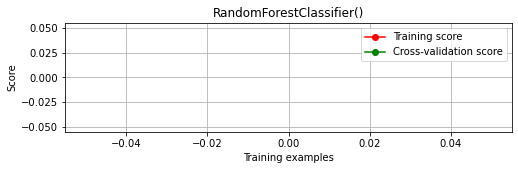

In [76]:
skplt.estimators.plot_learning_curve(rf, X_train, Y_train, RandomForestClassifier(), figsize=(8,2))

In [69]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        rf, X_train.to_numpy(), Y_train.to_numpy(), X_test.to_numpy(), Y_test.to_numpy(), 
        loss='mse',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

ValueError: could not convert string to float: 'Very-Satisfactory'

### DecisionTreeRegressor

<AxesSubplot:title={'center':"<class 'sklearn.tree._classes.DecisionTreeRegressor'>"}, xlabel='Training examples', ylabel='Score'>

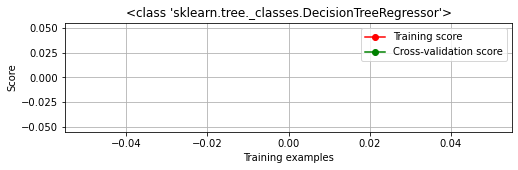

In [70]:
skplt.estimators.plot_learning_curve(dt, X_train, Y_train,DecisionTreeRegressor,figsize=(8,2))

In [72]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        dt, X_train.to_numpy(), Y_train.to_numpy(), X_test.to_numpy(), Y_test.to_numpy(), 
        loss='mse',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 1.522
Average bias: 104.807
Average variance: 0.066


### ExtraTreesRegressor

<AxesSubplot:title={'center':"<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>"}, xlabel='Training examples', ylabel='Score'>

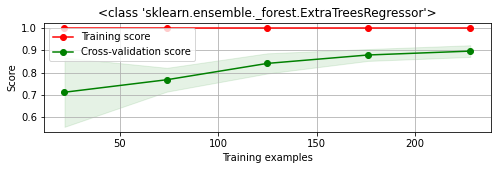

In [73]:
skplt.estimators.plot_learning_curve(etr, X_train, Y_train,ExtraTreesRegressor,figsize=(8,2))

In [74]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        etr, X_train.to_numpy(), Y_train.to_numpy(), X_test.to_numpy(), Y_test.to_numpy(), 
        loss='mse',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 1.330
Average bias: 94.773
Average variance: 0.014


### AdaBoostRegressor

<AxesSubplot:title={'center':"<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>"}, xlabel='Training examples', ylabel='Score'>

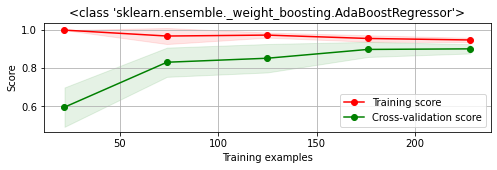

In [75]:
skplt.estimators.plot_learning_curve(ada, X_train, Y_train,AdaBoostRegressor,figsize=(8,2))

In [76]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        ada, X_train.to_numpy(), Y_train.to_numpy(), X_test.to_numpy(), Y_test.to_numpy(), 
        loss='mse',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 1.392
Average bias: 98.496
Average variance: 0.024


### LassoCV

<AxesSubplot:title={'center':"<class 'sklearn.linear_model._coordinate_descent.LassoCV'>"}, xlabel='Training examples', ylabel='Score'>

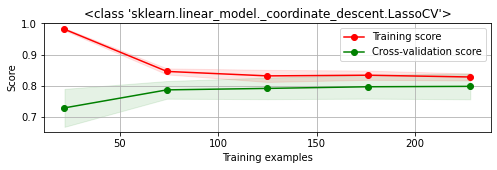

In [77]:
skplt.estimators.plot_learning_curve(lso, X_train, Y_train, LassoCV,figsize=(8,2))

In [78]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        lso, X_train.to_numpy(), Y_train.to_numpy(), X_test.to_numpy(), Y_test.to_numpy(), 
        loss='mse',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 1.349
Average bias: 96.396
Average variance: 0.010


In [79]:
#pip install yellowbrick

In [80]:
# Import Ensemble Bagging/Boosting Regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
from numpy import mean
from numpy import std
import math

from sklearn import model_selection
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import residuals_plot
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

#Import Old Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

svr = SVR()
knn = KNeighborsRegressor()

# PERFORM BAGGING AND BOOSTING METHOD

## BOOSTING METHOD

In [81]:
from mlxtend.regressor import StackingRegressor
from sklearn.metrics import r2_score

In [82]:
###[Boosting] ENSEMBLE MODEL [NEW]

# Apply GradientBoostingRegressor 
GradBoost_EST = GradientBoostingRegressor(n_estimators=20, max_features=1, max_leaf_nodes=5,random_state=42)

boosting_ensemble = StackingRegressor(regressors =[rf, dt, etr, ada, lso], meta_regressor=GradBoost_EST)
boosting_ensemble.fit(X_train,Y_train)

boosting_Ypredict = boosting_ensemble.predict(X_test)
print("ACCURACY SCORE: [ {:0%} ]".format(r2_score(Y_test,boosting_Ypredict)))

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        boosting_ensemble, X_train.to_numpy(), Y_train.to_numpy(), X_test.to_numpy(), Y_test.to_numpy(), 
        loss='mse',
        random_seed=123)
print("AVERAGE BIAS & VARIANCE | [NEW] BOOSTING MODEL")
print('\n\nAverage expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

ACCURACY SCORE: [ 92.608257% ]
AVERAGE BIAS & VARIANCE | [NEW] BOOSTING MODEL


Average expected loss: 1.291
Average bias: 91.709
Average variance: 0.017


In [83]:
###[Boosting] ENSEMBLE MODEL [OLD]

# Apply GradientBoostingRegressor 
GradBoost_EST = GradientBoostingRegressor(n_estimators=20, max_features=1, max_leaf_nodes=5,random_state=42)

boosting_ensembleOLD = StackingRegressor(regressors =[rf, dt, svr, knn, ada], meta_regressor=GradBoost_EST)
boosting_ensembleOLD.fit(X_train,Y_train)

boosting_Ypredict = boosting_ensembleOLD.predict(X_test)
print("ACCURACY SCORE: [ {:0%} ]".format(r2_score(Y_test,boosting_Ypredict)))

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        boosting_ensembleOLD, X_train.to_numpy(), Y_train.to_numpy(), X_test.to_numpy(), Y_test.to_numpy(), 
        loss='mse',
        random_seed=123)
print("AVERAGE BIAS & VARIANCE | [OLD] BOOSTING MODEL")
print('\n\nAverage expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

ACCURACY SCORE: [ 84.800200% ]
AVERAGE BIAS & VARIANCE | [OLD] BOOSTING MODEL


Average expected loss: 1.165
Average bias: 81.897
Average variance: 0.027


#=============================================================================================================================#

## BAGGING METHOD

#### [Bagging] ENSEMBLE MODEL 

In [84]:
cv=KFold(n_splits=10)
MoRF_BR = BaggingRegressor(base_estimator=RandomForestRegressor(), random_state=42)
MoRF_BR_bagging_scores = cross_val_score(MoRF_BR, X_train, Y_train, cv=cv)

MoDT_BR = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
MoDT_BR_bagging_scores = cross_val_score(MoDT_BR, X_train, Y_train,  cv=cv)

MoETR_BR = BaggingRegressor(base_estimator=ExtraTreesRegressor(), random_state=42)
MoETR_BR_bagging_scores = cross_val_score(MoETR_BR, X_train, Y_train,  cv=cv)

MoADA_BR = BaggingRegressor(base_estimator=AdaBoostRegressor(),random_state=42)
MoADA_BR_bagging_scores = cross_val_score(MoADA_BR, X_train, Y_train, cv=cv)

MoLSO_BR = BaggingRegressor(base_estimator=LassoCV(), random_state=42)
MoLSO_BR_bagging_scores = cross_val_score(MoLSO_BR, X_train, Y_train, cv=cv)

estimators = []
estimators.append(('RandomForestRegressor', MoRF_BR))
estimators.append(('DecisionTreeRegressor', MoDT_BR))
estimators.append(('ExtraTreesRegressor', MoETR_BR))
estimators.append(('AdaBoostRegressor', MoADA_BR))
estimators.append(('LassoCV', MoLSO_BR))

#### Let’s Vote! [BAGGING | High Accuracy ! ]
An ensemble meta-estimator known as a bagging regressor fits base regression to individual random subsets of the original dataset, and then combines each prediction (either by voting or by averaging) to get the final prediction.

In [85]:
# create the ensemble model
bagging_ensemble = VotingRegressor(estimators)
results = model_selection.cross_val_score(bagging_ensemble, X_train, Y_train, scoring="r2", cv=cv)

print("[Bagging score] : {:0%}".format(MoRF_BR_bagging_scores.mean()),"\nrf 10-fold cross validation : \n", MoRF_BR_bagging_scores)
print("[rf std score] : ", MoRF_BR_bagging_scores.std())

print("\n[nBagging score] : {:0%}".format(MoDT_BR_bagging_scores.mean()), "\ndt 10-fold cross validation : \n", MoDT_BR_bagging_scores)
print("[dt std score] : ", MoDT_BR_bagging_scores.std())

print("\n[Bagging score] : {:0%}".format(MoETR_BR_bagging_scores.mean()), "\netr 10-fold cross validation : \n", MoETR_BR_bagging_scores)
print("[etr std score] : ", MoETR_BR_bagging_scores.std())

print("\n[Bagging score] : {:0%}".format(MoADA_BR_bagging_scores.mean()), "\nada10-fold cross validation : \n", MoADA_BR_bagging_scores)
print("[ada std score] : ", MoADA_BR_bagging_scores.std())

print("\n[Bagging score] : {:0%}".format(MoLSO_BR_bagging_scores.mean()), "\nlso 10-fold cross validation : \n", MoLSO_BR_bagging_scores)
print("[lso std score] : ", MoLSO_BR_bagging_scores.std())

print("\n\nEnsemble R2 Score result: [{:0%}]".format(results.mean()))
print("Ensemble ST score : [{:0%}]".format(results.std()),"\n\n")
print(results)

[Bagging score] : 89.827313% 
rf 10-fold cross validation : 
 [0.95828182 0.90089308 0.87534756 0.93654039 0.9012903  0.95746032
 0.72133638 0.83332692 0.91244863 0.98580589]
[rf std score] :  0.07245526349034408

[nBagging score] : 91.040840% 
dt 10-fold cross validation : 
 [0.97742744 0.93875    0.87965    0.954325   0.90877238 0.98855196
 0.75266667 0.81286076 0.91147059 0.97960924]
[dt std score] :  0.0731208027883663

[Bagging score] : 86.290716% 
etr 10-fold cross validation : 
 [0.87929263 0.88752567 0.8126368  0.88536032 0.9058894  0.88988053
 0.71432463 0.88580983 0.86959906 0.89875275]
[etr std score] :  0.055146922593510964

[Bagging score] : 90.180180% 
ada10-fold cross validation : 
 [0.97914108 0.89990981 0.87660546 0.94676465 0.89167601 0.95417174
 0.74626736 0.83722193 0.92290238 0.96335752]
[ada std score] :  0.06639462369521874

[Bagging score] : 78.354348% 
lso 10-fold cross validation : 
 [0.85512089 0.81684862 0.7069378  0.76190113 0.8444561  0.86114592
 0.6228329

In [86]:
#Predict Target values from X_test
bagging_Ypredict = bagging_ensemble.fit(X_train, Y_train).predict(X_test)

#### [Bagging] ENSEMBLE MODEL with 'LOW' accuracy!

In [87]:
cv=KFold(n_splits=10)
MoDT_BR = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
MoDT_BR_bagging_scores = cross_val_score(MoDT_BR, X_train, Y_train, cv=cv)

MoRFR_BR = BaggingRegressor(base_estimator=RandomForestRegressor(),random_state=42)
MoRFR_BR_bagging_scores = cross_val_score(MoRFR_BR, X_train, Y_train, cv=cv)

MoSVR_BR = BaggingRegressor(base_estimator=SVR(),random_state=42)
MoSVR_BR_bagging_scores = cross_val_score(MoSVR_BR, X_train, Y_train, cv=cv)

MoKNN_BR = BaggingRegressor(base_estimator=KNeighborsRegressor(), random_state=42)
MoKNN_BR_bagging_scores = cross_val_score(MoKNN_BR, X_train, Y_train, cv=cv)

Moada_BR = BaggingRegressor(base_estimator=AdaBoostRegressor(), random_state=42)
Moada_BR_bagging_scores = cross_val_score(Moada_BR, X_train, Y_train,  cv=cv)

estimators = []
estimators.append(('DecisionTreeRegressor', MoDT_BR))
estimators.append(('RandomForestRegressor', MoRFR_BR))
estimators.append(('SVR', MoSVR_BR))
estimators.append(('KNeighborsRegressor', MoKNN_BR))
estimators.append(('GaussianNB', Moada_BR))

#### Let’s Vote! [BAGGING | Low Accuracy]
An ensemble meta-estimator known as a bagging regressor fits base regression to individual random subsets of the original dataset, and then combines each prediction (either by voting or by averaging) to get the final prediction.

In [88]:
# create the ensemble model
bagging_ensembleOld = VotingRegressor(estimators)
results = model_selection.cross_val_score(bagging_ensembleOld, X_train, Y_train, scoring="r2",cv=cv)

print("[Bagging score] : {:0%}".format(MoDT_BR_bagging_scores.mean()),"\ndt 10-fold cross validation : \n", MoDT_BR_bagging_scores)
print("[dt std score] : ", MoDT_BR_bagging_scores.std())

print("\n[nBagging score] : {:0%}".format(MoRFR_BR_bagging_scores.mean()), "\ndt 10-fold cross validation : \n", MoRFR_BR_bagging_scores)
print("[rfr std score] : ", MoRFR_BR_bagging_scores.std())

print("\n[Bagging score] : {:0%}".format(MoSVR_BR_bagging_scores.mean()), "\nsvr 10-fold cross validation : \n", MoSVR_BR_bagging_scores)
print("[svr std score] : ", MoSVR_BR_bagging_scores.std())

print("\n[Bagging score] : {:0%}".format(MoKNN_BR_bagging_scores.mean()), "\nknn 10-fold cross validation : \n", MoKNN_BR_bagging_scores)
print("[knn std score] : ", MoKNN_BR_bagging_scores.std())

print("\n[Bagging score] : {:0%}".format(Moada_BR_bagging_scores.mean()), "\nada 5-fold cross validation : \n", Moada_BR_bagging_scores)
print("[ada std score] : ", Moada_BR_bagging_scores.std())

print("\n\nEnsemble Accuracy Score result: [{:0%}]".format(results.mean()))
print("Ensemble ST score : [{:0%}]".format(results.std()),"\n\n")
print(results)

[Bagging score] : 91.040840% 
dt 10-fold cross validation : 
 [0.97742744 0.93875    0.87965    0.954325   0.90877238 0.98855196
 0.75266667 0.81286076 0.91147059 0.97960924]
[dt std score] :  0.0731208027883663

[nBagging score] : 89.827313% 
dt 10-fold cross validation : 
 [0.95828182 0.90089308 0.87534756 0.93654039 0.9012903  0.95746032
 0.72133638 0.83332692 0.91244863 0.98580589]
[rfr std score] :  0.07245526349034408

[Bagging score] : 31.020830% 
svr 10-fold cross validation : 
 [0.40602275 0.28770336 0.32863356 0.30644538 0.27826298 0.14736758
 0.30750781 0.3365117  0.37818893 0.32543892]
[svr std score] :  0.06567391605941111

[Bagging score] : 10.278936% 
knn 10-fold cross validation : 
 [ 0.20743536  0.15771667  0.0169      0.210098    0.17307724 -0.14075911
  0.01097778  0.17990481  0.15431765  0.05822522]
[knn std score] :  0.10776523139957243

[Bagging score] : 90.180180% 
ada 5-fold cross validation : 
 [0.97914108 0.89990981 0.87660546 0.94676465 0.89167601 0.95417174


# MODEL EVALUATION FOR BAGGING AND BOOSTING

### Prediction of Bagging and Boosting against Actual target

In [89]:
sample_Xdata = X_test.sample(50)
sample_Ydata = Y_test['gpa_range'].loc[sample_Xdata.index.values]

pred_bagg = bagging_ensemble.fit(sample_Xdata, sample_Ydata) # fit bagging ensemble model
pred_boost = boosting_ensemble.fit(sample_Xdata, sample_Ydata)    # fit boosting ensemble model

bagging_Ypred = pred_bagg.predict(sample_Xdata)
boost_Ypred = pred_boost.predict(sample_Xdata)

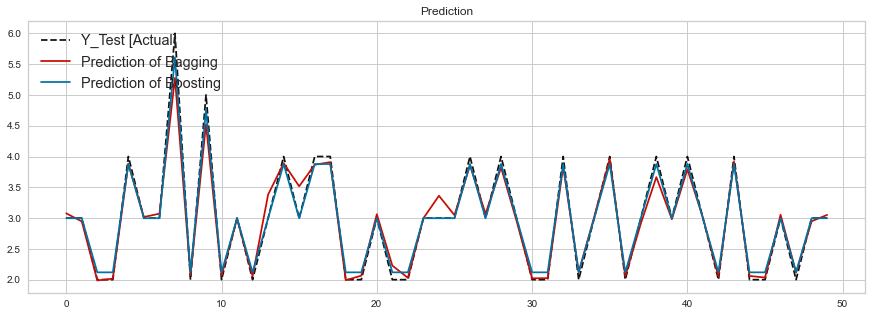

In [90]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(range(len(sample_Ydata)), sample_Ydata, '--k', label='Y_Test [Actual]')
ax.plot(range(len(sample_Ydata)), bagging_Ypred, 'r', label='Prediction of Bagging')
ax.plot(range(len(sample_Ydata)), boost_Ypred, 'b', label='Prediction of Boosting')
ax.legend(loc='upper left', fontsize='large')
ax.set_title("Prediction")
plt.show()

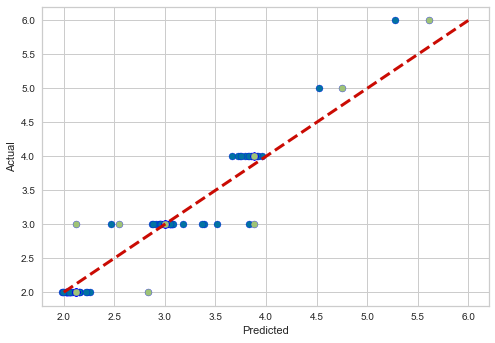

In [91]:
#Scatter illustrates plots against Actual and Predicted
fig, ax = plt.subplots()
ax.scatter( bagging_ensemble.predict(X_test), Y_test, edgecolors=(0, 0, 1))
ax.scatter( boosting_ensemble.predict(X_test), Y_test, edgecolors=(0, 0, 1))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Prediction Error of Bagging & Boosting Model 
This illustrations plots the expected vs. actual values in model space

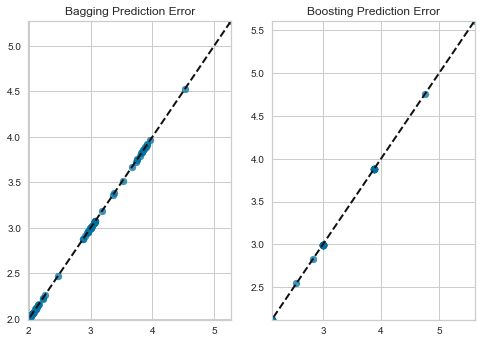

In [92]:
fig, (ax1,ax2)= plt.subplots(1,2)
ax1.set_title("Bagging Prediction Error")
EnsembleModel_Bagging = PredictionError(bagging_ensemble, ax=ax1)
ensem_baggingMethod_Score = EnsembleModel_Bagging.score(X_test, bagging_ensemble.predict(X_test))

ax2.set_title("Boosting Prediction Error")
EnsembleModel_Boosting = PredictionError(boosting_ensemble, ax=ax2)
ensem_boostingMethod_Score = EnsembleModel_Boosting.score(X_test, boosting_ensemble.predict(X_test))

<AxesSubplot:xlabel='gpa_range', ylabel='Density'>

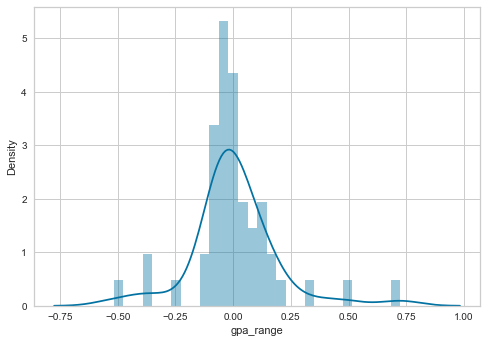

In [93]:
sns.distplot(sample_Ydata-bagging_Ypred, bins=30)

<AxesSubplot:xlabel='gpa_range', ylabel='Density'>

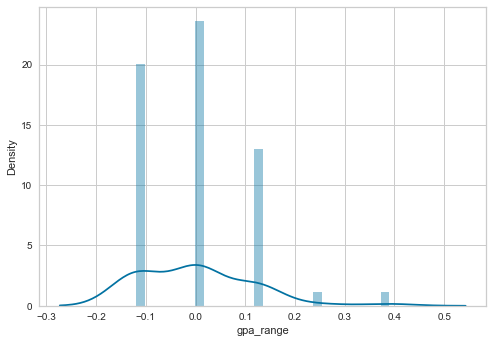

In [94]:
sns.distplot(sample_Ydata-boost_Ypred, bins=30)

In [95]:
maeBAGG = mean_absolute_error(Y_test, bagging_Ypredict)
mseBAGG = mean_squared_error(Y_test, bagging_Ypredict)
r2BAGG = r2_score(Y_test, bagging_Ypredict)

maeBOOST = mean_absolute_error(Y_test, boosting_Ypredict)
mseBOOST = mean_squared_error(Y_test, boosting_Ypredict)
r2BOOST =  r2_score(Y_test, boosting_Ypredict)

print("The model performance for testing set")
print("---------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------")
print('[BAGGING] Mean Absolute Error(MAE) is :{}'.format(maeBAGG),'  [BOOSTING] Mean Absolute Error(MAE) is :{}'.format(maeBOOST))
print('[BAGGING] Mean Squared Error(MSE) is :{}'.format(mseBAGG),'   [BOOSTING] Mean Squared Error(MSE) is :{}'.format(mseBOOST))
print('[BAGGING] R2 score is :{}'.format(r2BAGG), '                   [BOOSTING] R2 score is : {}'.format(r2BOOST))

The model performance for testing set
---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
[BAGGING] Mean Absolute Error(MAE) is :0.15747853835135822   [BOOSTING] Mean Absolute Error(MAE) is :0.2232012410114571
[BAGGING] Mean Squared Error(MSE) is :0.06080408929369536    [BOOSTING] Mean Squared Error(MSE) is :0.11528860297219706
[BAGGING] R2 score is :0.9198350969230629                    [BOOSTING] R2 score is : 0.8480020046266863


## Deploy trained model

In [96]:
import pickle

In [97]:
pickle.dump(bagging_ensemble, open('sa_model.pkl','wb'))

In [98]:
test_model = pickle.load(open('sa_model.pkl','rb'))

In [99]:
new_Xdata = X_test.sample(10)
new_Ydata = Y_test['gpa_range'].loc[new_Xdata.index.values]
print(new_Xdata)

      age  sex  course  yr_level  socioeconomic_stat  personality_type  \
248  19.0    1       2         3                   2                14   
73   22.0    0       1         4                   2                14   
322  21.0    0       4         3                   1                 4   
229  19.0    1       2         2                   3                10   
277  20.0    0       2         3                   1                13   
254  20.0    0       2         3                   1                 3   
45   21.0    0       1         3                   1                 3   
245  21.0    1       2         3                   1                 6   
157  21.0    1       3         4                   1                15   
265  20.0    1       2         3                   3                 3   

     fam_support  working_stud  scholar  TM1  ...  tablet  wifi  prepaid-wifi  \
248            1             0        0    2  ...       3     1             2   
73             1       

In [135]:
new_Xdata.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'GPA'],
      dtype='object')

In [100]:
new_Ydata

248    3
73     2
322    2
229    2
277    4
254    3
45     3
245    3
157    4
265    3
Name: gpa_range, dtype: int64

In [101]:
#predictions by the model
pred = test_model.predict(new_Xdata)
print(pred)

[3.05472982 2.25490896 2.14966244 2.14681015 3.88341539 2.99752327
 2.47053771 2.99302233 3.81957045 2.87308485]


In [102]:
print(new_Ydata.values)

[3 2 2 2 4 3 3 3 4 3]


In [103]:
#checking for the accuracy score using r-squared
mse2 = mean_squared_error(new_Ydata, pred)
print('Mean Squared Error:\n', mse2)
acc = r2_score(new_Ydata, pred)
print('Accuracy Score:\n', acc)

Mean Squared Error:
 0.04545653832329723
Accuracy Score:
 0.9072315544422506
